In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import pymysql
pymysql.install_as_MySQLdb()


In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Find the latest date of record
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"The last date is {latest}.")
print("therefore the first date should be 2016-08-23")
# Date 12 months before the last date of record
#date_start_query = (latest - dt.timedelta(days=365))
#print(f"Therefore, query begins on {date_start_query}.")

The last date is 2017-08-23.
therefore the first date should be 2016-08-23


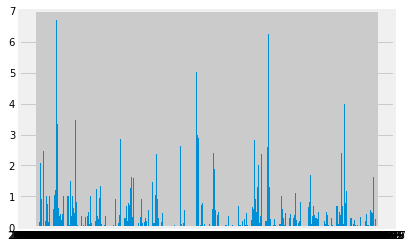

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_year = engine.execute('SELECT date, prcp FROM measurement WHERE date >= "2016-08-23"').fetchall()
# Calculate the date 1 year ago from the last data point in the database
precip_year_df = pd.DataFrame(precip_year)
precip_year_df.columns = ['date', 'prcp']

# Perform a query to retrieve the data and precipitation scores
dates= precip_year_df['date']
prcp = precip_year_df['prcp']
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_year_df = precip_year_df.set_index('date')
precip_year_df.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
#ax = precip_year_df.plot.bar()
plt.bar(dates, prcp)
plt.show()

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_year_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
stations = engine.execute('SELECT DISTINCT station from measurement').fetchall()
len(stations)

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = engine.execute('select station, count(prcp) from measurement group by station order by count(prcp) desc').fetchall()
station_activity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_max = engine.execute('select station, max(tobs) as "max" from measurement where station = "USC00519281" group by station').fetchall()
station_min = engine.execute('select station, min(tobs) as "min" from measurement where station = "USC00519281" group by station').fetchall()
station_avg = engine.execute('select station, avg(tobs) as "avg" from measurement where station = "USC00519281" group by station').fetchall()

print(station_max)
print(station_min)
print(station_avg)

[('USC00519281', 85.0)]
[('USC00519281', 54.0)]
[('USC00519281', 71.66378066378067)]


In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year = engine.execute('select date, station, tobs from measurement where station = \
                        "USC00519281" and date >= "2016-08-23"')
year_df = pd.DataFrame(year.fetchall())
year_df.columns = ['date', 'station', 'tobs']
dates = year_df[['date']]
tobs = year_df[['tobs']]
year_df.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [20]:
year_df[['tobs']].describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [35]:
tobs = tobs.values.tolist()
tobs.count()

AttributeError: 'list' object has no attribute 'values'

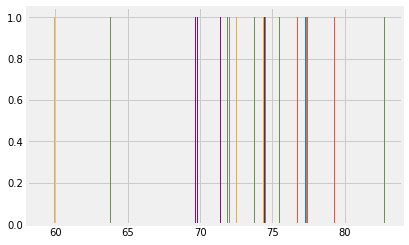

In [34]:
plt.hist(tobs, bins = 12, label = "temperature")
#plt.legend(frameon=True, facecolor="whitesmoke")
#plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')
#plt.gca().set_axisbelow(True)
plt.show()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
